In [34]:

import numpy as np
from netCDF4 import Dataset 
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
import urllib
import json

cor=pd.read_excel('confinement_index_code/confinement index 20April2020.xlsx',header=2,usecols='J:L',nrows=228)
cc_code=cor['country code']
cc_name=cor['Index scale']


In [35]:
c_c=np.load('google_cg_high_ex.npy') #Google mobility based trends
#c_c=np.load('corinne_c_low.npy') #or corrine_c for orignal data from Excel countries Edgar.ipynb
c_us=np.load('corinne_cus.npy')
c_china=np.load('corinne_cchina.npy')
b_c=np.load('corinne_b.npy')
b_us=np.load('corinne_bus.npy')
b_china=np.load('corinne_bchina.npy')

#b_c[:,:,49]=1E-10
# trans,red,pub,ind,ship,avi,avn

In [36]:
c_c.shape

(366, 8, 143)

In [37]:
b_c[0,:,:143].sum()*356/1000

34.43557985097689

In [38]:
for i in range(143):
    print (cc_name[i],b_c[0,2,i]/b_c[0,:,i].sum(axis=0)*100,b_c[0,1,i]/b_c[0,:,i].sum(axis=0)*100)

Albania 8.576997925698947 5.068226458930936
Algeria 2.761341361726443 15.384614805025706
Angola 8.900998990037598 7.175295496462139
Argentina 7.953443754701689 11.54219293048013
Armenia 10.465116747430923 22.09302268432741
Australia 3.2692309054249766 2.307692367225855
Austria 2.901353892847352 9.767891805226272
Azerbaijan 4.906771108243987 17.46810567129402
Bahrain 0.0 0.8530805289260585
Bangladesh 4.808635776834581 11.285574484930178
Belarus 4.671967957682859 7.952286094107221
Belgium 7.164633758374789 13.03353751129449
Benin 0.5923001487627145 1.283316995097591
Bolivia 18.79327341360916 5.934718118817195
Bosnia and Herzegovina 1.7982016230137459 2.8971026801448767
Botswana 1.4925372752711024 0.3980099559286421
Brazil 3.660885974252431 3.949903642392103
Brunei Darussalam 1.1605416376976625 1.353965200793403
Bulgaria 1.7612523842738887 1.859099821984897
Cambodia 4.377432025156852 1.4591438758557163
Cameroon 1.3888889537568738 6.746032431136601
Canada 10.059761133478027 6.8725095764533

In [39]:
b_c.shape

fracs=c_c/b_c
frac_tot=c_c[:,:,:].sum(axis=1)/b_c[:,:,:].sum(axis=1)

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(MtCO2/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(MtCO2/day)']=b_c[0,:,:].sum(axis=0)
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(MtCO2/day)']=b_c[0,i,:]
    df2['Base%']=b_c[0,i,:143]/b_c[0,:,:143].sum(axis=0)*100
    df = pd.concat([df, df2])
df.to_csv('Covid_CO2emissions_sectors_July05.csv',columns=colsw,header=True)





/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
frac_tot.shape

(366, 143)

In [41]:
# residential and commerical fractions (%) by country to split EDGAR data
#
fr=100*b_c[0,1,:143]/(b_c[0,1,:143]+b_c[0,2,:143])
fc=100*b_c[0,2,:143]/(b_c[0,1,:143]+b_c[0,2,:143])

# intl air and internatinoal sea fractions (%) by country to split EDGAR data
fair=100*b_c[0,5,:143]/b_c[0,5,:143].sum()
fsea=100*b_c[0,4,:143]/b_c[0,4,:143].sum()

#for i in range(143):
#    print (cc_name[i],fr[i],fc[i])

z=np.zeros(2)
fr =np.concatenate((fr,z))
fc =np.concatenate((fc,z))

print (fair)

[3.03183927e-03 2.32452926e-01 2.74955138e-01 5.51313916e-01
 2.86441295e-02 2.43937819e+00 3.76943949e-01 9.15231211e-02
 2.36961635e-01 2.13190412e-01 7.59943849e-02 8.43038098e-01
 1.42289996e-02 4.06154034e-02 3.59450002e-03 5.52811705e-03
 1.13742252e+00 4.47155461e-02 1.18119766e-01 5.00041655e-02
 1.07968950e-02 2.82825219e-01 2.99107701e-01 4.74831610e+00
 8.06640182e-01 1.66129289e-02 9.75691412e-02 6.95818302e-02
 7.71237433e-02 7.11944301e-02 4.54624743e-02 1.56538735e-01
 1.75717242e-01 0.00000000e+00 5.54053020e-02 5.13835249e-01
 2.39002934e-03 1.52942948e-01 2.37655365e-01 1.01702661e-01
 4.66459603e-03 3.56840476e-02 2.92304305e-01 3.66292662e-01
 3.47480604e+00 5.24338305e-02 5.42940522e-02 4.90954222e+00
 1.00152347e-01 6.05377560e-29 5.39203961e-01 5.17814660e-02
 1.04462129e-02 2.46682628e-02 3.30597898e+00 1.15767408e-01
 3.09511113e-01 2.20100437e+00 9.17892877e-01 9.55885450e-01
 4.74093368e-01 5.10102486e-01 5.22270908e-01 1.73798565e+00
 1.20905546e-01 3.469005

In [42]:
b_c[:,:,49]=1E-10 #gibralter is not wanted but this prevents nans

In [43]:
b_c=np.where(b_c ==0.0,1E-10,b_c)

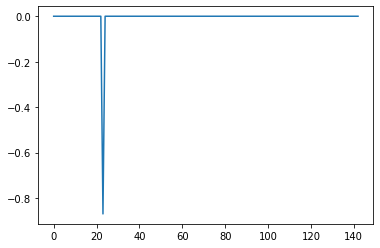

In [44]:
pl.plot(c_c[26,0,:]-c_c[15,0,:])

In [45]:
c_c[100,:,:].sum()

-27.102126201447177

In [46]:
dfd = pd.read_excel('EDGAR/v50_SO2_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('SO2_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,6.21986,50.104,18.6474,7.77067,4.59176,0,0.0634062,14.8882,8.85997
1,DZA,Algeria,38.9812,24.7714,14.3803,2.7559,15.3543,0.152151,0.479212,11.9071,89.8805
2,AGO,Angola,37.8197,7.04202,3.58709,12.482,10.0621,0.270028,0.547954,27.0602,92.977
3,ARG,Argentina,63.8186,17.8684,3.96388,2.4253,3.51965,0.0962787,0.193893,7.14156,526.86
4,ARM,Armenia,0.717862,33.415,34.3702,6.77307,14.2987,0,5.58203,0,0.950826
5,AUS,Australia,53.535,33.1874,2.77248,0.780395,0.550867,0.305246,0.454771,2.90567,993.903
6,AUT,Austria,22.0958,56.6248,0.30729,1.44283,4.85752,0.0657393,1.43473,1.94451,48.6814
7,AZE,Azerbaijan,81.4483,4.81336,9.97472,0.693981,2.47057,0.474623,0.413452,4.93113,41.017
8,BHR,Bahrain,3.56968,47.7115,6.18518,0,7.20369,0.290828,3.62145,31.6898,12.1242
9,BGD,Bangladesh,48.3094,27.8898,10.0276,3.19544,7.4995,0,0.170086,2.53571,232.251


In [47]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_SO2emissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
np.transpose(frac_tot).shape

(143, 366)

In [49]:
dfd = pd.read_excel('EDGAR/v50_BC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('BC_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.343788,8.33993,47.4188,22.5161,13.305,0,0.0204422,4.34041,1.00231
1,DZA,Algeria,3.48158,6.77062,83.9595,0.121345,0.676062,0.0686998,0.213311,4.79275,7.36453
2,AGO,Angola,26.9924,2.36912,11.3988,26.8145,21.6158,0.0471644,0.0943529,4.21342,19.6938
3,ARG,Argentina,6.84139,15.2606,23.3863,1.12952,1.63918,0.0589086,0.116955,3.89531,31.8569
4,ARM,Armenia,0.0634109,0.527472,11.8871,25.049,52.8813,0,0.368785,0,0.52491
5,AUS,Australia,3.94019,40.138,21.7695,4.11012,2.90126,0.335153,0.492257,2.84406,33.4896
6,AUT,Austria,6.17623,23.7415,35.3328,7.65052,25.7568,0.0288698,0.621151,0.761251,4.10112
7,AZE,Azerbaijan,7.40984,4.69174,44.2795,3.11019,11.0723,0.714778,0.613838,6.62015,1.00763
8,BHR,Bahrain,2.20624,19.694,27.3804,0,0.907688,0.452631,5.55645,43.967,0.288206
9,BGD,Bangladesh,2.17403,3.77896,9.83301,21.7275,50.9931,0,0.0453768,0.611727,31.7509


In [50]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_BCemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
dfd = pd.read_excel('EDGAR/v50_NOx_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('NOx_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.437045,13.2186,66.1136,2.27898,1.34667,0,0.240151,7.44782,29.2089
1,DZA,Algeria,28.7174,6.70042,55.0765,0.806898,4.49557,0.294338,1.1384,3.736,472.427
2,AGO,Angola,21.8295,3.90244,38.5703,4.35782,3.51294,1.14943,2.86426,18.6824,222.097
3,ARG,Argentina,17.3124,13.2806,42.0562,2.01016,2.91719,0.548264,1.35587,6.59603,940.751
4,ARM,Armenia,10.1435,6.5299,62.9223,3.79579,8.01334,0,3.30788,0,20.0346
5,AUS,Australia,38.7241,15.1323,26.8276,1.02678,0.724782,2.08004,3.8055,3.21144,1483.07
6,AUT,Austria,12.2086,19.6783,51.0083,1.71636,5.77841,0.188305,5.04668,0.903394,172.808
7,AZE,Azerbaijan,28.5792,5.58476,42.916,2.15723,7.67972,2.26091,2.41856,3.80988,87.5523
8,BHR,Bahrain,61.7796,8.80524,13.7543,0,0.405745,0.499685,7.64078,8.83096,71.752
9,BGD,Bangladesh,41.833,14.1431,24.5435,2.10783,4.94695,0,0.924315,1.82005,533.631


In [52]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_NOxemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
dfd = pd.read_excel('EDGAR/v50_NH3_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('NH3_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.00853648,0.0551258,0.467562,0.940296,0.555629,0,0.00210695,0.000498735,39.4435
1,DZA,Algeria,0.451367,0.410854,2.37961,0.0559032,0.311461,0.0287572,0.0867451,0.00217284,73.4538
2,AGO,Angola,19.6912,0.491768,0.0317596,13.9345,11.2329,0.0329464,0.0640307,0.00318771,117.706
3,ARG,Argentina,1.64809,1.15078,0.632473,0.306394,0.444645,0.01517,0.0292592,0.00108642,516.488
4,ARM,Armenia,0.000947376,0.0056997,2.09367,2.56015,5.40477,0,0.0521387,0,15.0591
5,AUS,Australia,0.156415,1.27154,1.86508,0.688179,0.485773,0.0810076,0.115589,0.000744513,578.48
6,AUT,Austria,0.36219,1.88158,2.11069,0.649972,2.18824,0.00498004,0.104094,0.000142222,99.2603
7,AZE,Azerbaijan,0.399091,0.0191704,0.879549,0.165835,0.590372,0.0497286,0.0414886,0.000498831,60.468
8,BHR,Bahrain,3.60303,52.5178,22.582,0,0.893214,0.377324,4.49994,0.039696,1.44343
9,BGD,Bangladesh,0.527791,0.498043,0.183866,4.01324,9.41883,0,0.0116347,0.000174859,502.271


In [54]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_NH3emissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
dfd = pd.read_excel('EDGAR/v50_CO_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('CO_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.06745,7.44277,37.6167,30.6791,18.1286,0,0.00980482,0.152351,76.1986
1,DZA,Algeria,21.3812,3.78809,75.6102,0.29938,1.66798,0.0717022,0.0893889,0.14698,640.814
2,AGO,Angola,27.5871,0.401672,22.7079,23.4218,18.8808,0.0349292,0.0280558,0.0916862,2415.01
3,ARG,Argentina,3.27458,3.48942,42.088,0.758965,1.10142,0.0229614,0.0183033,0.0446124,7422.49
4,ARM,Armenia,0.52529,0.332871,24.6934,21.0319,44.4006,0,0.111156,0,63.5013
5,AUS,Australia,6.34267,13.9755,34.0064,4.95825,3.49994,0.361451,0.213153,0.0901238,2820.13
6,AUT,Austria,5.57675,31.9176,8.29158,11.85,39.895,0.0157806,0.136324,0.0122265,681.375
7,AZE,Azerbaijan,9.81344,7.36204,58.6782,2.26397,8.05972,0.368609,0.127099,0.100313,177.447
8,BHR,Bahrain,16.8237,72.5643,11.3145,0,0.0954956,0.0591357,0.291471,0.168782,200.338
9,BGD,Bangladesh,4.31529,6.03803,12.0858,19.6748,46.1756,0,0.0148111,0.0146121,3546.99


In [56]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_COemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
dfd = pd.read_excel('EDGAR/v50_OC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('OC_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.055582,1.27381,16.4419,42.0703,24.8598,0,0.00522671,1.1287,1.92706
1,DZA,Algeria,2.29364,3.57086,82.6448,0.564623,3.14576,0.0457212,0.138901,3.17413,5.55963
2,AGO,Angola,1.29668,0.774072,3.13287,42.4185,34.1945,0.00903795,0.0176906,0.803468,51.634
3,ARG,Argentina,0.724029,1.17281,4.61717,1.76986,2.56845,0.00790059,0.0153472,0.519875,119.34
4,ARM,Armenia,0.0685636,0.398904,3.33342,26.1093,55.1197,0,0.0518872,0,1.83397
5,AUS,Australia,0.752989,4.35797,7.4517,7.25805,5.12333,0.0863049,0.124027,0.728803,65.34
6,AUT,Austria,1.28231,9.12521,16.8898,14.7399,49.6244,0.00885175,0.186343,0.232268,6.72018
7,AZE,Azerbaijan,2.03575,1.71342,13.4785,5.56666,19.8173,0.160065,0.134496,1.47526,2.26068
8,BHR,Bahrain,22.1944,11.7633,36.3287,0,2.21261,0.30628,3.67877,29.6059,0.21399
9,BGD,Bangladesh,0.161515,4.74815,1.96385,21.5077,50.4774,0,0.005865,0.0804149,120.758


In [58]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_OCemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
dfd = pd.read_excel('EDGAR/v50_NMVOC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('NMVOC_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,5.10838,2.68216,25.5885,6.63287,3.91942,0,0.0078411,2.23723,31.0619
1,DZA,Algeria,54.9522,1.04346,23.7749,0.0876985,0.488606,0.00296122,0.025961,0.78383,719.304
2,AGO,Angola,63.0394,0.329647,10.4686,9.15066,7.37656,0.00392055,0.0221453,1.32889,997.421
3,ARG,Argentina,17.7187,4.89311,40.4627,0.954551,1.38526,0.00779619,0.0437033,1.95599,1013.41
4,ARM,Armenia,2.47786,0.737104,20.6559,6.82609,14.4106,0,0.0705681,0,32.6081
5,AUS,Australia,38.0266,5.19813,18.0809,2.3755,1.67682,0.0492032,0.20405,1.58421,960.376
6,AUT,Austria,12.4431,11.136,6.2996,5.02368,16.9131,0.00353942,0.21502,0.35411,140.831
7,AZE,Azerbaijan,33.7511,0.517301,30.7005,0.432421,1.53942,0.0169169,0.04102,0.594482,179.239
8,BHR,Bahrain,58.6526,2.91539,20.7494,0,0.132154,0.0116341,0.403252,4.28781,47.2063
9,BGD,Bangladesh,4.51971,2.80895,5.73182,12.3072,28.8843,0,0.0169744,0.307502,1008.95


In [60]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_NMVOCemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
dfd = pd.read_excel('EDGAR/v50_CH4_1970_2015c.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('CH4_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,5.42676,0.0938783,0.160967,1.33119,0.786611,0,9.55168e-05,0.118673,117.576
1,DZA,Algeria,78.9651,0.0194386,0.111808,0.00909885,0.0506936,9.40296e-05,0.000283637,0.0372909,3035.74
2,AGO,Angola,67.2455,0.0130077,0.0977546,2.03146,1.63761,0.000302704,0.000588302,0.153726,1731.23
3,ARG,Argentina,17.5486,0.0708695,0.312839,0.0750581,0.108926,0.000213944,0.000412648,0.0804214,4948.94
4,ARM,Armenia,16.2642,0.00774444,1.32882,0.944398,1.99373,0,0.0011032,0,96.1781
5,AUS,Australia,50.5867,0.0865046,0.113662,0.124335,0.0877661,0.00079788,0.00113849,0.0384895,7936.78
6,AUT,Austria,18.8981,0.664323,0.285087,1.36976,4.61152,0.000167389,0.0034988,0.025091,399.072
7,AZE,Azerbaijan,50.3939,0.00834721,0.0719722,0.0444988,0.158416,0.000535728,0.000446959,0.0282065,758.501
8,BHR,Bahrain,89.2906,0.419408,0.101097,0,0.0116708,0.000319024,0.00380466,0.176162,230.704
9,BGD,Bangladesh,7.26332,0.0208738,0.10392,0.919707,2.1585,0,0.000162694,0.0128341,4853.87


In [62]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_CH4emissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
dfd = pd.read_excel('EDGAR/v50_N2O_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)

subAIR =dfd[dfd.ISO_A3.str.contains('AIR')]
subSEA =dfd[dfd.ISO_A3.str.contains('SEA')]
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want[:143]:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','IntlAviation','IntlShipping','Total'])
df_out['ISO_A3']=cc_want[:143]
df_out['Name']=cc_nwant[:143] 


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want[:143]:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
 
        total=sub['2015'].sum()+subAIR['2015'].sum()*fair[ic]/100+subSEA['2015'].sum()*fsea[ic]/100  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlAviation'] = subAIR['2015'].sum()/total*fair[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'IntlShipping'] = subSEA['2015'].sum()/total*fsea[ic]
df_out.to_csv('N2O_Corinne_Edgar_aviation.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.0210842,0.248185,1.38085,1.53243,0.905525,0,0.04179,0.681652,3.75397
1,DZA,Algeria,0.674037,17.9648,4.39287,0.0433736,0.241653,0.0514035,0.541496,0.93466,22.2125
2,AGO,Angola,1.09105,0.173501,0.899475,2.62606,2.11693,0.120213,0.815901,2.799,17.4374
3,ARG,Argentina,0.264709,0.496925,0.747569,1.09586,1.59034,0.0255591,0.172159,0.440492,165.702
4,ARM,Armenia,0.134381,0.0445084,3.10316,1.78865,3.77604,0,0.875143,0,1.69361
5,AUS,Australia,1.80188,9.16939,2.33336,0.92247,0.651155,0.155714,0.775929,0.344393,162.673
6,AUT,Austria,3.32533,8.82398,6.67547,1.00594,3.38665,0.0193004,1.40885,0.132642,13.8442
7,AZE,Azerbaijan,0.655014,0.068722,2.01777,1.08102,3.84843,0.205147,0.597715,0.495215,7.92308
8,BHR,Bahrain,5.46421,0.403188,7.66287,0,0.111241,0.318295,13.2565,8.05829,0.924928
9,BGD,Bangladesh,0.168148,0.22124,0.883864,2.60388,6.11115,0,0.163376,0.169199,67.5205


In [64]:
fracs=c_c/b_c

bwork= np.empty([8,143])
bworkp= np.empty([8,143])
fract=np.empty([366,143])
tot=np.zeros(143)
for ic in range(143):
    bwork[0,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Surface_Transport']/100
    bwork[1,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Residential']/100
    bwork[2,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Public']/100
    bwork[3,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Industry']/100
    bwork[4,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlShipping']/100
    bwork[5,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['IntlAviation']/100
    bwork[6,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Aviation']/100
    bwork[7,ic]=df_out.iloc[ic]['Total']*df_out.iloc[ic]['Power']/100
    
    bworkp[0,ic]=df_out.iloc[ic]['Surface_Transport']
    bworkp[1,ic]=df_out.iloc[ic]['Residential']
    bworkp[2,ic]=df_out.iloc[ic]['Public']
    bworkp[3,ic]=df_out.iloc[ic]['Industry']
    bworkp[4,ic]=df_out.iloc[ic]['IntlShipping']
    bworkp[5,ic]=df_out.iloc[ic]['IntlAviation']
    bworkp[6,ic]=df_out.iloc[ic]['Aviation']
    bworkp[7,ic]=df_out.iloc[ic]['Power']
    for i in range(366):
        fract[i,ic]=(fracs[i,:,ic]*bwork[:,ic]).sum()/df_out.iloc[ic]['Total']
    tot[ic]=df_out.iloc[ic]['Total']
    
frac_tot=fract.copy()

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(kt/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(frac_tot), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(kt/day)']=tot/365
df['Base%']=100
df['Sector'][:]='total'
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(kt/day)']=bwork[i,:]/365
    df2['Base%']=bworkp[i,:]
    df = pd.concat([df, df2])
df.to_csv('Covid_N2Oemissions_sectors_July05.csv',columns=colsw,header=True)



/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
subAIR['2015'].sum()*fair[ic]

1.99954168698418

In [66]:
pd.set_option('display.max_rows', None)
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,IntlAviation,IntlShipping,Total
0,ALB,Albania,0.0210842,0.248185,1.38085,1.53243,0.905525,0,0.04179,0.681652,3.75397
1,DZA,Algeria,0.674037,17.9648,4.39287,0.0433736,0.241653,0.0514035,0.541496,0.93466,22.2125
2,AGO,Angola,1.09105,0.173501,0.899475,2.62606,2.11693,0.120213,0.815901,2.799,17.4374
3,ARG,Argentina,0.264709,0.496925,0.747569,1.09586,1.59034,0.0255591,0.172159,0.440492,165.702
4,ARM,Armenia,0.134381,0.0445084,3.10316,1.78865,3.77604,0,0.875143,0,1.69361
5,AUS,Australia,1.80188,9.16939,2.33336,0.92247,0.651155,0.155714,0.775929,0.344393,162.673
6,AUT,Austria,3.32533,8.82398,6.67547,1.00594,3.38665,0.0193004,1.40885,0.132642,13.8442
7,AZE,Azerbaijan,0.655014,0.068722,2.01777,1.08102,3.84843,0.205147,0.597715,0.495215,7.92308
8,BHR,Bahrain,5.46421,0.403188,7.66287,0,0.111241,0.318295,13.2565,8.05829,0.924928
9,BGD,Bangladesh,0.168148,0.22124,0.883864,2.60388,6.11115,0,0.163376,0.169199,67.5205
